Import Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

Import Dataset

In [2]:
(train_features , train_labels ) , (test_features , test_labels ) = tf.keras.datasets.cifar10.load_data()

In [3]:
train_features.shape

(50000, 32, 32, 3)

In [4]:
train_features = train_features.reshape((50000 , 32 , 32 , 3))
test_features = test_features.reshape((10000 , 32 , 32 , 3))

In [5]:
train_features = train_features.astype('float32')
test_features = test_features.astype('float32')

In [6]:
train_features/=255
test_features/=255

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
model = tf.keras.Sequential()

In [10]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

In [11]:
model.add(Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(MaxPooling2D((2, 2)))

In [12]:
model.add(Conv2D(128, (3, 3), activation='relu',  padding='same'))
model.add(MaxPooling2D((2, 2)))

In [13]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))

In [14]:
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [18]:
model.compile(loss ='categorical_crossentropy' , optimizer = 'sgd' , metrics = ['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [20]:
with tf.device('/gpu:0'):
    logs = model.fit(train_features , train_labels , batch_size = 64 , epochs = 100 , validation_split = 0.1  )

Epoch 1/100
704/704 [==============================] - 18s 8ms/step - loss: 2.1842 - accuracy: 0.1919 - val_loss: 2.0035 - val_accuracy: 0.2764
Epoch 2/100
704/704 [==============================] - 5s 8ms/step - loss: 1.9619 - accuracy: 0.2873 - val_loss: 2.0457 - val_accuracy: 0.2500
Epoch 3/100
704/704 [==============================] - 5s 8ms/step - loss: 1.8043 - accuracy: 0.3525 - val_loss: 1.7544 - val_accuracy: 0.3692
Epoch 4/100
704/704 [==============================] - 5s 8ms/step - loss: 1.6635 - accuracy: 0.4036 - val_loss: 1.7335 - val_accuracy: 0.3596
Epoch 5/100
704/704 [==============================] - 5s 7ms/step - loss: 1.5622 - accuracy: 0.4348 - val_loss: 1.4476 - val_accuracy: 0.4812
Epoch 6/100
704/704 [==============================] - 5s 7ms/step - loss: 1.4950 - accuracy: 0.4607 - val_loss: 1.9513 - val_accuracy: 0.3602
Epoch 7/100
704/704 [==============================] - 5s 7ms/step - loss: 1.4424 - accuracy: 0.4815 - val_loss: 1.3915 - val_accuracy: 0.499

In [25]:
loss = logs.history['loss']

In [27]:
accuracy = logs.history['accuracy']

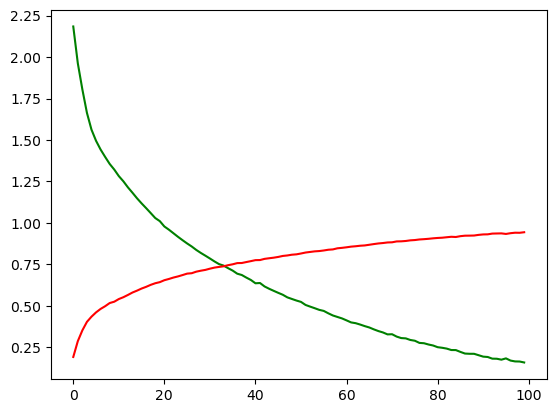

In [29]:
plt.plot(loss , c= 'green')
plt.plot(accuracy , c = 'red')

Testing

In [31]:
y_pred = model.predict(test_features)

313/313 [==============================] - 1s 2ms/step


In [36]:
accuracy = model.evaluate(test_features , test_labels)[1]

313/313 [==============================] - 1s 3ms/step - loss: 1.1254 - accuracy: 0.7502


In [37]:
print("Accuracy in test data is : " , accuracy)

Accuracy in test data is :  0.7501999735832214


In [38]:
import pickle

In [40]:
pickle.dump(model , open('CIFAR_Classifier.pkl' , 'wb'))

INFO:tensorflow:Assets written to: ram://e7400c4d-dcc9-4065-b531-27b36ce7ccc3/assets


INFO:tensorflow:Assets written to: ram://e7400c4d-dcc9-4065-b531-27b36ce7ccc3/assets
